/Users/josselinperrus/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josselinperrus/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josselinperrus/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/josselinperrus/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

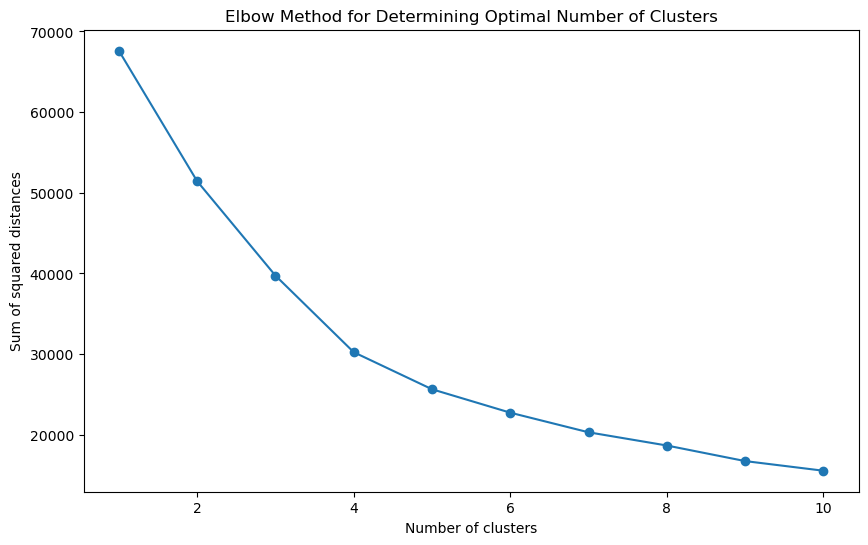

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading the data
df = pd.read_csv('rev-transactions.csv')

# Data Cleaning
df['ea_cardholderpresence'].fillna('UNKNOWN', inplace=True)
df['ea_merchant_mcc'].fillna(0, inplace=True)
df['ea_merchant_city'].fillna('UNKNOWN', inplace=True)
df['ea_merchant_country'].fillna('UNKNOWN', inplace=True)

# Feature Engineering
user_features = df.groupby('user_id').agg({
    'amount_usd': ['sum', 'count'],
    'transactions_type': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'UNKNOWN',
    'transactions_state': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'UNKNOWN',
    'transactions_currency': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'UNKNOWN',
    'direction': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'UNKNOWN'
}).reset_index()
user_features.columns = ['_'.join(col).strip() for col in user_features.columns.values]
user_features.rename(columns={'user_id_': 'user_id'}, inplace=True)

# One-hot Encoding
user_features_encoded = pd.get_dummies(user_features, columns=['transactions_type_<lambda>', 'transactions_state_<lambda>', 'transactions_currency_<lambda>', 'direction_<lambda>'])

# Scaling
scaler = StandardScaler()
numerical_features = user_features_encoded[['amount_usd_sum', 'amount_usd_count']]
numerical_features_scaled = scaler.fit_transform(numerical_features)
user_features_encoded[['amount_usd_sum', 'amount_usd_count']] = numerical_features_scaled

# Clustering
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_features_encoded.drop('user_id', axis=1))
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()


In [3]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(user_features_encoded.drop('user_id', axis=1))

# Get the cluster labels for each user
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in your feature matrix
user_features_encoded['cluster'] = cluster_labels


/Users/josselinperrus/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
# Check the size of each cluster
cluster_sizes = user_features_encoded['cluster'].value_counts()
print(cluster_sizes)


0    13252
2     4289
3     1221
1        4
Name: cluster, dtype: int64


In [7]:
# Get cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=user_features_encoded.drop('user_id', axis=1).columns)  # we drop 'user_id', not 'cluster'
print(centroids)


ValueError: Shape of passed values is (4, 45), indices imply (4, 46)